In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

D:\Programs\Anaconda3\envs\tf2.1\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\Programs\Anaconda3\envs\tf2.1\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [32]:
def normalize(X,axis=0):
    mean=np.mean(X,axis=axis,keepdims=True)
    std=np.std(X,axis=axis,keepdims=True)
    X=(X-mean)/std
    return X

In [35]:
# data
boston=tf.contrib.learn.datasets.load_dataset('boston')
X_train,Y_train=boston.data[:,5], boston.target
#X_train=normalize(X_train)
n_samples=len(X_train)

In [49]:
#声明占位符
X=tf.placeholder(tf.float32, name="X")
Y=tf.placeholder(tf.float32, name="Y")

In [50]:
# 创建权重变量和偏置变量
w=tf.Variable(0.0, name="w")
b=tf.Variable(0.0, name="b")

In [51]:
# 定义模型
Y_hat=X*w + b

In [52]:
# 定义损失函数
loss=tf.square(Y-Y_hat, name="loss")

In [53]:
# 选择优化器
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)

In [55]:
init_op=tf.global_variables_initializer()
total=[]

with tf.Session() as sess:
    sess.run(init_op)
    writer = tf.summary.FileWriter("../data/graphs",sess.graph)
    # train
    for i in range(100):
        total_loss=0
        for x,y in zip(X_train, Y_train):
            _,loss_tmp=sess.run([optimizer,loss], feed_dict={X:x,Y:y})
            total_loss+=loss_tmp
        total.append(total_loss/n_samples)
        print("Epoch{0}: Loss {1}".format(i, total_loss/n_samples))
    writer.close()
    b_value,w_value=sess.run([b,w])
            

Epoch0: Loss 26.779895120142466
Epoch1: Loss 25.532963559892984
Epoch2: Loss 25.308105514786394
Epoch3: Loss 25.10842958027482
Epoch4: Loss 24.930981125067394
Epoch5: Loss 24.773168119782166
Epoch6: Loss 24.63269657542246
Epoch7: Loss 24.507561973939524
Epoch8: Loss 24.395995892890088
Epoch9: Loss 24.296436210372303
Epoch10: Loss 24.207509442804618
Epoch11: Loss 24.12800798017121
Epoch12: Loss 24.05685957382555
Epoch13: Loss 23.993130210483717
Epoch14: Loss 23.93598476036447
Epoch15: Loss 23.88469580368127
Epoch16: Loss 23.838609592460674
Epoch17: Loss 23.79715412149717
Epoch18: Loss 23.759826562716107
Epoch19: Loss 23.72617975498383
Epoch20: Loss 23.695819259177686
Epoch21: Loss 23.668390857997256
Epoch22: Loss 23.643586170807783
Epoch23: Loss 23.621129276800527
Epoch24: Loss 23.600774940486847
Epoch25: Loss 23.5823057752245
Epoch26: Loss 23.56553128231661
Epoch27: Loss 23.550277626216015
Epoch28: Loss 23.53639167287385
Epoch29: Loss 23.52373552081982
Epoch30: Loss 23.512190676023653


DONE


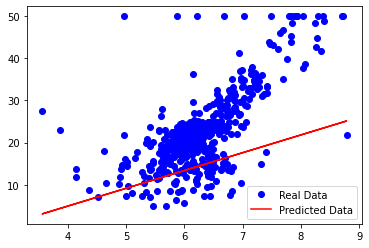

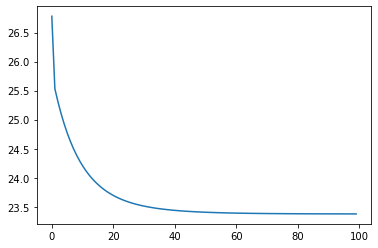

In [47]:
# test
Y_pred=X_train*w_value+b_value
print("DONE")
plt.plot(X_train,Y_train,'bo',label="Real Data")
plt.plot(X_train,Y_pred,'r',label="Predicted Data")
plt.legend()
plt.show()
plt.plot(total)
plt.show()